In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.9.0


In [2]:
boston = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston.load_data()

order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [3]:
print(train_data[0])

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [4]:
# USE pandas to display the data in a nicer way
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [6]:
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [7]:
def build_model():
    
  model = keras.Sequential([
    
      keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])

  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [9]:
class PrintDot(keras.callbacks.Callback):
    
  def on_epoch_end(self,epoch,logs):
    
    if epoch % 100 == 0: print('')
    print('.', end='')

epochs = 500

history = model.fit(train_data, train_labels, epochs=epochs,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

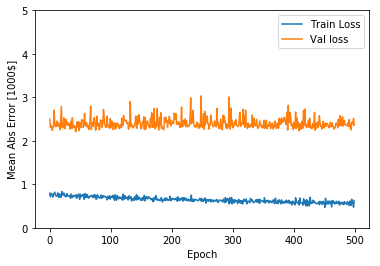

In [11]:
import matplotlib.pyplot as plt


def plot_history(history):
    
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
    
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
    
  plt.ylim([0,5])
  plt.show()

plot_history(history)


....................................................................................................
....................................................................................................
....................

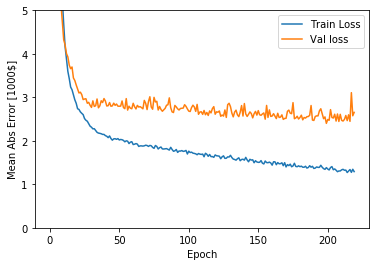

In [13]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
# Checks for improvement every 20 epochs. If no improvement, training is stopped

history = model.fit(train_data, train_labels, epochs=epochs,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [14]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose = 0)

print("Testing Mean Absolute Error for test set: ${:7.2f}".format(mae * 1000))

Testing Mean Absolute Error for test set: $2989.79


In [15]:
test_predictions = model.predict(test_data).flatten()
print(test_predictions)

[ 8.264024 19.019781 20.42444  32.098125 24.928576 21.664663 23.699867
 20.203707 19.49837  21.59323  18.827044 15.819579 16.034622 40.666195
 20.314243 18.417969 23.928774 16.315662 19.363462 25.2348   12.130019
 13.8734   21.182825 15.023749 18.4411   25.196718 29.197973 29.085806
 10.357844 18.514292 20.065935 14.908845 32.101406 22.876741 20.244616
  8.351429 17.649132 18.426378 18.207487 22.769747 29.023355 27.128302
 13.230849 39.409595 29.978075 25.000626 26.322094 17.925268 23.275248
 21.615358 30.283875 19.930151 10.633117 15.084962 32.48106  26.617426
 12.443388 46.295227 33.4838   23.29851  23.862455 16.461447 14.981854
 19.40307  22.45088  19.154245 13.951926 19.402723 13.319291  8.017361
 25.071009 27.454271 26.782766 12.949059 21.956614 17.437744 17.803883
 21.74209  33.23834  10.40525  21.194187 36.354504 14.872504 13.373822
 18.064856 17.51862  21.08755  19.81278  20.1373   32.200775 20.868746
 17.054644 23.497663 37.9077   33.926823 20.918564 34.24956  47.83784
 24.203